In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SimpleModels as nrn

In [48]:
params_pn = {'tau':20, 'r':100, 'vth':-40, 'v0':-65, 'vahp':-80, 'vmax':30, 'ev':-65, 'tahp':10}
params_pv = {'tau':5, 'r':100, 'vth':-50, 'v0':-65, 'vahp':-80, 'vmax':30, 'ev':-65, 'tahp':0}
# set synapse type & parameter
syn_pn2pn = {'gbar_syn':1e-3, 'tau_r':0.3, 'tau_d':6, 'es':0, 'd':1}
syn_pn2pv = {'gbar_syn':1e-3, 'tau_r':0.3, 'tau_d':6, 'es':0, 'd':1}
syn_pv2pn = {'gbar_syn':1e-3, 'tau_r':0.5, 'tau_d':6, 'es':-80, 'd':1}
syn_pv2pv = {'gbar_syn':1e-3, 'tau_r':0.5, 'tau_d':6, 'es':-80, 'd':1}

In [49]:
n_exc = 8
n_inh = 2

tmax = 300
dt = 0.01
nrn.set_times(tmax, dt)

# create cell types
n_cells = n_exc+n_inh
cell_types = []
for i in range(n_cells):
    if i < n_exc:
        cell_types.append(0)
    else:
        cell_types.append(1)
# fully connected network
cnt_map = np.ones([n_cells, n_cells], dtype=int) * (-1)
syn_types = [[0, 1], [2, 3]]
for i in range(n_cells):
    for j in range(n_cells):
        if i != j:
            cnt_map[i][j] = syn_types[cell_types[i]][cell_types[j]]    

params_ntk = nrn.get_params([params_pn, params_pv], [syn_pn2pn, syn_pn2pv, syn_pv2pn, syn_pv2pv], cell_types, cnt_map)
for i in range(n_cells):
    params_ntk['v0'][i] = np.random.normal(loc=-65, scale=10)

# external current
Iext = np.zeros(len(nrn._times[1:]))
Iext[(nrn._times[1:]<=250)&(nrn._times[1:]>=50)] = 1

In [61]:
ntk = nrn.CellNetwork(**params_ntk, Iext=0.2*Iext, target_id=[[i for i in range(n_cells)]], std=0.15)
ntk.run()

100%|███████████████████████████████████████████████████████████████████████████| 30000/30000 [00:03<00:00, 8212.82it/s]


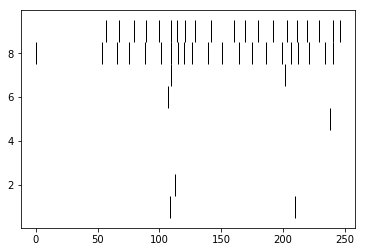

In [62]:
itvs = []
for i in range(n_cells):
    t = nrn._times[ntk.vcells[:, i] == 30]
    if i < n_exc:
        itvs = np.concatenate((itvs, t[1:]-t[:-1]))
#     print(itv)
    plt.vlines(t, i-0.5, i+0.5, lw=1)
    

In [63]:
print(np.average(itvs))

96.535
